EDA-4. Статистические тесты 
8. Популярные статистические тесты в Python

In [389]:
import pandas as pd

!python -m wget "URL" (edited) 

Объединение два массива в DataFrame. 

In [390]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

df = pd.DataFrame({'petersburg': petersburg}, columns=['petersburg'])
df1 = pd.DataFrame({'magadan': magadan}, columns=['magadan'])
data = pd.concat([df, df1], axis=1)
values = {
    'petersburg': data['petersburg'].median(),
}
#заполняем оставшиеся записи константами в соответствии со словарем values
combine_data = data.fillna(values)
combine_data


,petersburg,magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


# Проверка данных на нормальность

In [391]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (мы отвергаем H0)'

In [392]:
alpha = 0.05

Тест Шапиро-Уилка

In [393]:
_, p = shapiro(combine_data)
print('p=%.3f' % p)

if p > alpha:
	print(H0)
else:
	print(Ha)

p=0.101
Данные распределены нормально


In [394]:
_, p = normaltest(combine_data)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.035
Данные распределены нормально


c:\Users\pavel\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Обоснования выбора теста на корреляцию.

Для проверки распределения данных на нормальность, были применены Тест Шапиро-Уилка и Тест Д’Агостино, которые подтвердили, что данные распределены нормально. В связи с этим результатом, можем провести тест на корреляцию по методу Пирсона и понять присутствует ли зависимость между переменными.

In [395]:
from scipy.stats import pearsonr

data1 = combine_data['petersburg']
data2 = combine_data['magadan']


corr, p = pearsonr(data1, data2)
print(corr,p)

0.25666515110501303 0.5394705530383969


In [396]:
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутсвии зависимости между переменными.")

0.5394705530383969 > 0.05. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.


P-value выше уровня значимости, результаты считаются статистически не-значимыми и мы не можем отвергнуть нулевую гипотезу. По графику ниже, можно сделать вывод что корреляция очень слабая.

<AxesSubplot: >

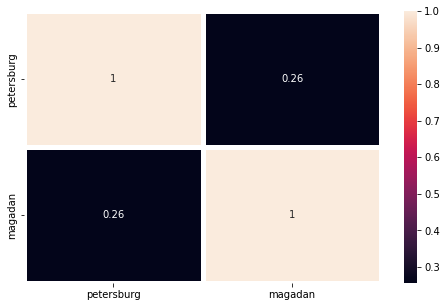

In [397]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(combine_data.corr(), annot=True, linewidths=5, ax=ax)

Обоснование выбора теста на сравнение.

Оценивая разницу размера раковины мидии в зависимости от города-производителя, будет более правильно применить Независимый Т-тест для анализа различия и сходства данных, так как, у нас выражается в количестве - диаметр раковины мидии и разные совокупности - города-производителя. Как гипотезу проверим на значимость разницы среди размера раковины мидий в разных города.

In [398]:
H0 = 'Нет значимой разницы между средним размером раковины мидий в двух разных городах.'
Ha = 'Есть значимая разница между средним размером раковины мидий в двух разных городах.'

In [399]:
from scipy.stats import ttest_ind

In [400]:
def t_test(x):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(combine_data['petersburg'], combine_data['magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(combine_data)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Есть значимая разница между средним размером раковины мидий в двух разных городах.


P-value ниже уровня значимости, результаты считаются статистически значимыми - можем отвергаем нулевую гипотезу.